Analysis of the advantage gained by an adversarial relayer $A$, where the relayer tries to reuse the same validator signatures to 

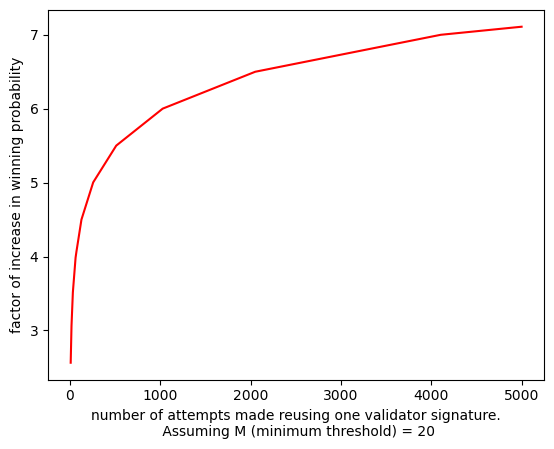

In [52]:
import math
import numpy as np
import matplotlib.pyplot as plt

def advantage(k, M):
    res=0
    k = int(k)
    for i in range(1,k):
        res = res + 1/2**(M + math.ceil(math.log2(i)))
    #print("Probability of one shot", 1/2**M)
    #print("Probability of k tries without dynamic", k/2**M)
    #print("Probability of k tries with dynamic", res)
    #print("advantage gained", res /(1/(2**M)))
    
    return (res / (1/2**M))

advantage(10000,20)


x = np.linspace(10, 5000, 1000)
y = np.asarray(x, dtype = 'int')    
#print(y)

z=[]
for i in y:
    z.append(advantage(i,20))

plt.xlabel('number of attempts made reusing one validator signature.\n Assuming M (minimum threshold) = 20')
plt.ylabel('factor of increase in winning probability')
plt.plot(y, z, color='red')